# Hauptkomponentenanalyse - Principal Component Analysis (PCA)

## Introduction
Das Ziel der PCA ist, Muster in Daten zu identifizieren. Die PCA zielt darauf ab, die Korrelation zwischen Variablen zu ermitteln. Die Intention, die Dimensionalität zu reduzieren, ist nur dann sinnvoll, wenn eine starke Korrelation zwischen Variablen besteht.

Kurz gesagt, bei der PCA geht es um folgendes: Ermittlung der Richtungen mit der maximalen Varianz in hochdimensionalen Daten und eine anschließende Projektion auf einen kleineren dimensionalen Unterraum, während die meisten Informationen behalten werden.

## PCA and Dimensionsreduktion
Häufig besteht das gewünschte Ziel darin, die Dimensionen eines d-dimensionalen Datensatzes zu reduzieren, indem er auf einen (k)-dimensionalen Unterraum projiziert wird (wobei k <d ist), um die Recheneffizienz zu erhöhen und gleichzeitig den größten Teil der Informationen beizubehalten.

## Eine Zusammenfassung des PCA-Ansatzes
* Ermittlung der Eigenvektoren (Eigenvectors) und Eigenwerte (Eigenvalues) anhand Kovarianzmatrix <br>
* Sortierung der Eigenwerte in absteigender Reihenfolge und Auswahl der k Eigenvektoren, die den k größten Eigenwerten entsprechen, wobei k die Anzahl der Dimensionen des neuen Merkmalsunterraums ist (k <= d).
* Konstruktion der Projektionsmatrix <b>W</b> aus den ausgewählten k Eigenvektoren.
* Transformierung des ursprünglichen Datensatzes <b>X </b> über <b>W</b>, um einen k-dimensionalen Merkmalsunterraum <b>Y</b> zu erhalten.

## Iris Datensatz

Für die anstehende Aufgabe wird der bereits bekannte Iris-Datensatz verwendet.

<img src="./Figures/Iris-Datensammlung.png" alt="drawing" style="width:400px;"/>

## Datensatz einlesen

Lesen Sie den Iris-Datensatz aus dem Verzeichnis /Data ein. Speichern Sie hierbei die numerischen Werte und die Class labels in unterschiedlichen Variablen.

In [1]:
import numpy as np
import csv as csv
import matplotlib.pyplot as plt
import pandas as pd
import itertools
%matplotlib inline

In [2]:
# TODO: implement
df = pd.read_csv("./Data/iris.data", header=None, sep=",", names=["s_length", "s_width", "p_length", "p_width","class"])
X = df.loc[:, df.columns != 'class']
y = df.loc[:, df.columns == 'class']

X.head()

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [3]:
y.head()

,class
0,Iris-setosa
1,Iris-setosa
2,Iris-setosa
3,Iris-setosa
4,Iris-setosa


Der Iris-Datensatz ist jetzt in Form einer 150$\times$4-Matrix gespeichert, in der die Spalten die verschiedenen Merkmale darstellen und jede Zeile eine separate Blumenprobe darstellt. Jedes Sample <b>x</b> kann als 4-dimensionaler Vektor dargestellt werden

In [4]:
X.shape

(150, 4)

In [5]:
X[0:10]

,s_length,s_width,p_length,p_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Visualisierung

Die Daten (3 verschiedene Blumenklassen befinden sich entlang der 4 verschiedenen Merkmale) lassen sich über Histogramme wiefolgt visualisieren.

Figure:
<img src="./Figures/Exploratory-Visualization.png" alt="drawing" style="width:400px;"/>

# 1 - Berechnung der Kovarianzmatrix

Die Eigenvektoren und Eigenwerte einer Kovarianzmatrix bilden den „Kern“ einer PCA: Die Eigenvektoren (Hauptkomponenten) bestimmen die Richtungen des neuen Merkmalsraums, und die Eigenwerte bestimmen ihre Größe. Mit anderen Worten, die Eigenwerte erklären die Varianz der Daten entlang der neuen Merkmalsachsen.

## Kovarianzmatrix C
Die Herangehensweise der PCA besteht darin, die Eigendekomposition anhand der Kovarianzmatrix $\Sigma$ vorzunehmen. Diese ist ein d$\times$d-Matrix, bei der jedes Element die Kovarianz zwischen zwei Merkmalen darstellt. Die Kovarianz zwischen zwei Merkmalen wird wie folgt berechnet:

$\sigma_{jk} = \frac{1}{n-1}\sum_{i=1}^{n}\left(  x_{ij}-\bar{x}_j \right)  \left( x_{ik}-\bar{x}_k \right).$

Die Berechnung der Kovarianzmatrix wird über die folgende Matrixgleichung zusammengefasst:
$\Sigma = \frac{1}{n-1} \left( (\mathbf{X} - \mathbf{\bar{x}})^T\;(\mathbf{X} - \mathbf{\bar{x}}) \right)$

mit $\bar{x}$ als Mittelwertvektor $\mathbf{\bar{x}} = \frac{1}{n} \sum\limits_{i=1}^n x_{i}.$

Der Mittelwertvektor (mean vector) ist ein d-dimensionaler Vektor, bei dem jeder Wert in diesem Vektor den Stichprobenmittelwert einer Merkmalsspalte im Datensatz darstellt.

Implementieren Sie eigenständig den Mittelwertvektor und die Kovarianzmatrix. Testen Sie das Ergebnis Ihrer Implementierung anhand der Funktion <b>numpy.cov()</b>.

In [6]:
# TODO: implement
#X = np.array([[3, 1, 4, 2, 5],[3,1,2,4,5]]).T

#copy array
X_cov = X.copy()
X_numpy = X_cov.to_numpy().T

#remove mean
X_numpy -= X_numpy.mean(axis=1)[(slice(None), np.newaxis)]

#get n
N = X_numpy.shape[1]
n = float(N - 1)

#calculate
cov_mat = np.dot(X_numpy, X_numpy.T) / n
print(cov_mat)



[[ 0.68569351 -0.03926846  1.27368233  0.5169038 ]
 [-0.03926846  0.18800403 -0.32171275 -0.11798121]
 [ 1.27368233 -0.32171275  3.11317942  1.29638747]
 [ 0.5169038  -0.11798121  1.29638747  0.58241432]]


In [7]:
#Test
X.cov()


,s_length,s_width,p_length,p_width
s_length,0.685694,-0.039268,1.273682,0.516904
s_width,-0.039268,0.188004,-0.321713,-0.117981
p_length,1.273682,-0.321713,3.113179,1.296387
p_width,0.516904,-0.117981,1.296387,0.582414


# 2 - Eigendekomposition - Berechnung Eigenvektoren and Eigenwerte

Im folgenden wird das in der Vorlesung (Prof. Laubenheimer) besprochene Vorgehen Schritt-für-Schritt umgesetzt, mit einer kleinen Abwandlung. Die einzelnen Berechnungsschritte sind für eine eigenständige Implementierung Ihrerseits im Rahmen dieses Labors zu aufwendig. Daher können Sie auf Implementierungen von Bibliotheks-Funktionen zurückgreifen. Welche diese konkret sind wird jedoch nicht vorweggenommen. Diese sind Ihrerseits anhand von Recherche-Arbeiten herauszufinden.

## 2.1. Charakteristisches Polynom
Der erste Schritt ist die Aufstellung des charakteristischen Polynoms. 

In [8]:


# TODO: implement
cp = np.poly(np.matrix(cov_mat))
print(cp)

[ 1.00000000e+00 -4.56929128e+00  1.48186720e+00 -1.12910083e-01
  1.90327580e-03]


## 2.2. Eigenwerte (Nullstellen)
Der zweite Schritt ist die Berechnung der Nullstellen anhand des charakteristischen Polynoms. Damit einhergehend sind die Eigenwerte bestimmt.

In [9]:
# TODO: implement
eig_vals = np.roots(cp)
print(eig_vals)

[4.22484077 0.24224357 0.07852391 0.02368303]


## 2.3. Eigenvektoren
Der dritte Schritte ist die Berechnung der Eigenvektoren durch Lösung der Gleichung: <br>
$C−\lambda_i \cdot I \cdot \vec{e}_i = \vec{0}$.

In der Vorlesung und in der Klausur (sofern diese Aufgabe gestellt wird), wird an dieser Stelle das Lineare Gleichungssystem (LGS) gelöst. Dies sollten Sie an dieser Stelle auch tun! Leider erzeugen jedoch die gängigen LGS-Solver, wie bspw. <b>scipy.linalg.solve()</b> und <b>numpy.linalg.solve()</b>, lediglich die triviale Lösung. Gerne können Sie das erproben.<br>

<b>Achtung!</b>: Hier kommt der Teil, an dem wir vom Skript abweichen: <br>
* Stellen Sie für jede Nullstelle <i>i</i> (Eigenwert) folgende Matrix m auf: $m_i = (C−\lambda_i \cdot I).$
* Führen Sie für jede Nullstelle auf Basis der Matrizen eine QR-Zerlegung (https://de.wikipedia.org/wiki/QR-Zerlegung) durch. Dh finden Sie eine Funktion die dies berechnet. Die QR-Zerlegung unterstützt Sie bei der Lösung eines linearen Gleichungssystems. Das Resultat der Zerlegung sind die zwei Matrizen <b>q</b> und <b>r</b>.<br>
* Bestimmen Sie den <i>Rang der Matrix</i> wiefolgt: Ermitteln Sie in <b>r</b> die Zeile, in der sämtliche Werte 0 sind bzw. "nah dran". Der Rang der Matrix ist der Wert der ermittelten Zeile minus 1. <br> Zum Beispiel: Angenommen, in der Zeile 4 sind alle Werte nah an 0, dann ist der Rang der Matrix: Zeile 4 minus 1 = 3. (Grafik: Rot) <br> 
* Bestimmen Sie die <i>Eigenvektoren</i> wiefolgt: Ermitteln Sie in <b>q</b> die vom Ende betrachtet n-r Spalten (mit n=Dimension, r=Rang). In diesen Spalten sind die Eigenvektoren enthalten. <br> Zum Beispiel: Angenommen die Dimension n=4 und der Rang r=3, dann sind die Eigenvektoren in der vom Ende betrachteten Spalte n-r= 4-3= 1, dh die erste Spalte vom Ende betrachtet, bzw. die vierte Spalte vom Anfang betrachtet. (Grafik: Grün)

<img src="./Figures/q_r_color.png" alt="drawing" style="width:400px;"/>

Nochmals der Hinweis führen Sie dieses Verfahren für alle Nullstellen durch und erzeugen Sie eine geeignete Datenstruktur.<br>

Testen Sie das Ergebnis Ihrer Implementierung anhand der Funktion <b>numpy.linalg.eig()</b>.

In [10]:
# TODO: implement

eig_vecs = []

mi = []
for i in eig_vals:
    # 𝑚𝑖=(𝐶−𝜆𝑖⋅𝐼)
    mi = np.subtract(cov_mat, (i * np.identity(len(eig_vals))))
    
    #qr zerlegung
    qr = np.linalg.qr(mi, mode='complete')
    q = qr[0]
    r = qr[1]
    #print(r)

    #rang
    rang = 0
    for x in range(len(r)):
        sum_of_x = 0
        for y1 in r[x]:
            sum_of_x += y1.round(3)
        if sum_of_x == 0:
            rang = x-1
    #print(rang)
    
    spalte = len(r) - rang
    spalte = len(r)+1 - spalte
    
    erg = []
    for x in q:
        erg.append(x[spalte])
    eig_vecs.append(erg)
eig_vecs = np.array(eig_vecs)
print(eig_vals)
print(eig_vecs)

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]
 [-0.58099728  0.59641809  0.07252408  0.54906091]
 [ 0.31725455 -0.32409435 -0.47971899  0.75112056]]


In [11]:
print(np.linalg.eig(cov_mat)[0])  
print(np.linalg.eig(cov_mat)[1])  

[4.22484077 0.24224357 0.07852391 0.02368303]
[[ 0.36158968 -0.65653988 -0.58099728  0.31725455]
 [-0.08226889 -0.72971237  0.59641809 -0.32409435]
 [ 0.85657211  0.1757674   0.07252408 -0.47971899]
 [ 0.35884393  0.07470647  0.54906091  0.75112056]]


# 3 - Auswahl der Hauptkomponenten (Principal Components)

## Sortierung der Eigenpaare (Eigenpairs)

Das Ziel der PCA ist es, die Dimensionalität des ursprünglichen Merkmalsraums zu reduzieren, indem dieser auf einen kleineren Unterraum projiziert wird, in dem die Eigenvektoren die Achsen bilden. Die Eigenvektoren definieren jedoch nur die Richtungen der neuen Achse, da sie alle die gleiche Einheitslänge 1 haben. Dies kann durch die folgenden beiden Codezeilen bestätigt werden:

In [12]:
for ev in eig_vecs.T:
    np.testing.assert_array_almost_equal(1.0, np.linalg.norm(ev))

Um zu entscheiden, welche/r Eigenvektor/en entfallen kann/können, ohne dass zu viele Informationen für die Konstruktion des niederdimensionalen Unterraums verloren gehen, müssen die entsprechenden Eigenwerte untersucht werden: Die Eigenvektoren mit den niedrigsten Eigenwerten enthalten die geringste Information über die Verteilung der Daten; diese können entfallen. Zu diesem Zweck werden die Eigenwerte von den höchsten zu den niedrigsten geordnet/ sortiert, um die besten k Eigenvektoren auszuwählen.

Erzeugen Sie eine Liste von Tupeln, welche die Eigenwerte und Eigenvektoren enthält. Und sortieren Sie diese entsprechend.

In [13]:
# Make a list of (eigenvalue, eigenvector) tuples
# TODO: implement
eig_pairs = []

for i in range(len(eig_vals)):
    eig_pairs.append([eig_vals[i], eig_vecs[i]])

eig_pairs.sort(reverse = True)
print(eig_pairs)

[[4.224840768320108, array([ 0.36158968, -0.08226889,  0.85657211,  0.35884393])], [0.24224357162751547, array([-0.65653988, -0.72971237,  0.1757674 ,  0.07470647])], [0.0785239080941546, array([-0.58099728,  0.59641809,  0.07252408,  0.54906091])], [0.02368302712600244, array([ 0.31725455, -0.32409435, -0.47971899,  0.75112056])]]


## Explained Variance

Nach der Sortierung der Eigenpaare stellen Sie sich möglicherweise folgende Frage: <i>"Wie viele Hauptkomponenten werden für den neuen Feature-Unterraum ausgewählt?"</i> <br>

Ein nützliches Maß ist die sogenannte "explained variance", die sich aus den Eigenwerten berechnen lässt. Die "explained variance" gibt an, wie viel Informationen (Varianz) den einzelnen Hauptkomponenten zugeordnet werden können.

Ermitteln Sie die "explained variance", indem sie den prozentualen Anteil der einzelnen Eigenwerten aus der Gesamtheit Eigenwerten berechnen.

In [14]:
eig_sum = 0

for i in eig_vals:
    eig_sum+= i
    
percent = []

for i in eig_vals:
    percent.append(i/eig_sum)
    
print(percent)



[0.9246162071742683, 0.0530155678505351, 0.017185139525006814, 0.0051830854501900454]


Die Berechnung zeigt deutlich, dass der größte Teil der Varianz (92.46% der Varianz) allein durch die erste Hauptkomponente erklärt werden kann. Die zweite Hauptkomponente enthält noch etwas Informationen (5.30%), während die dritte und vierte Hauptkomponente sicher fallengelassen werden können, ohne zu viele Informationen zu verlieren. Zusammen enthalten die ersten beiden Hauptkomponenten 97.76% der Informationen

## Projektionsmatrix W

Es folgt die Konstruktion der Projektionsmatrix, mit der die Iris-Daten in den neuen Feature-Unterraum transformiert werden. Die Projektionsmatrix ist im Grunde genommen eine Matrix der konkatenierten Top-k-Eigenvektoren. <br>

Es erfolgt eine Reduktion des 4-dimensionalen Merkmalsraum auf einen 2-dimensionalen Merkmalsunterraum, indem die "Top 2"-Eigenvektoren mit den höchsten Eigenwerten ausgewählt werden, um die d$\times$k-dimensionale Projektionsmatrix (auch: Eigenvektormatrix) <b>W</b> zu konstruieren. 

Erzeugen Sie die Projektionsmatrix <b>W</b> (mit einem shape: (4, 2)) aus den Eigenpairs.

In [15]:
# TODO: implement
matrix_w = np.array([np.array(eig_pairs[0][1]), np.array(eig_pairs[1][1])])
print(matrix_w)

[[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [-0.65653988 -0.72971237  0.1757674   0.07470647]]


# 4 - Projektion in den neuen Feature-Unterraum

In diesem letzten Schritt wird die 4$\times$2-dimensionale Projektionsmatrix W verwendet, um die Daten über die Gleichung auf den neuen Unterraum zu transformieren:

$Y=X \cdot W$ <br>

wobei Y eine 150$\times$2-Matrix der transformierten Daten ist.

In [16]:
# TODO: implement
Y = X.dot(matrix_w.T)
print(Y.shape)
print(Y)

(150, 2)
            0         1
0    2.827136 -5.641331
1    2.795952 -5.145167
2    2.621524 -5.177378
3    2.764906 -5.003599
4    2.782750 -5.648648
..        ...       ...
145  7.455360 -5.502139
146  7.037007 -4.939703
147  7.275389 -5.393243
148  7.412972 -5.430600
149  6.901009 -5.031837

[150 rows x 2 columns]


In [17]:
Y.head(-5)

,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648
...,...,...
140,7.825646,-5.497333
141,7.433794,-5.723995
142,6.925415,-4.739799
143,8.074666,-5.590698


Führen Sie folgenden Code aus und visualisieren Sie das Ergebnis.

In [19]:
print(y.shape)
Y = pd.DataFrame(Y)
Y.head()


(150, 1)


,0,1
0,2.827136,-5.641331
1,2.795952,-5.145167
2,2.621524,-5.177378
3,2.764906,-5.003599
4,2.782750,-5.648648


In [22]:
Y["class"] = y
Y.head()

,0,1,class
0,2.827136,-5.641331,Iris-setosa
1,2.795952,-5.145167,Iris-setosa
2,2.621524,-5.177378,Iris-setosa
3,2.764906,-5.003599,Iris-setosa
4,2.782750,-5.648648,Iris-setosa


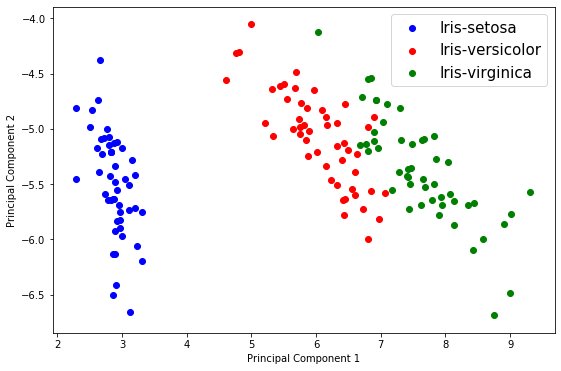

In [28]:
# TODO: implement
df = Y
plt.figure(figsize=(9,6))
ax = plt.subplot()
ax.scatter(df[df["class"]=="Iris-setosa"][0],df[df["class"]=="Iris-setosa"][1],c='blue')
ax.scatter(df[df["class"]=="Iris-versicolor"][0],df[df["class"]=="Iris-versicolor"][1],c='red')
ax.scatter(df[df["class"]=="Iris-virginica"][0],df[df["class"]=="Iris-virginica"][1],c='green')

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.legend(('Iris-setosa','Iris-versicolor', 'Iris-virginica'),scatterpoints=1,loc='upper right',fontsize=15,)

In [ ]:

with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(6, 4))
    for lab, col in zip(('Iris-setosa', 'Iris-versicolor', 'Iris-virginica'),
                        ('blue', 'red', 'green')):
        plt.scatter(Y.loc[y==lab, 0],
                    Y.loc[y==lab, 1],
                    label=lab,
                    c=col)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(loc='lower center')
    plt.tight_layout()
    plt.show()


Das Ergebnis sollte wiefolgt aussehen: 
<img src="./Figures/pca_result.png" alt="drawing" style="width:400px;"/>